<a href="https://colab.research.google.com/github/Jaaaaniiiii/ML-StudyGroup-4/blob/main/Machine_Learning_Study_Group_4_by_GDGoC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - Study Group #4:
*   NAMA: Janiar Rahma Putri
*   JURUSAN: S1 Teknik Telekomunikasi
*   NIM: 101012300091



### **1. Dataset FDC (Food Data Collection)**
Dataset ini berkaitan dengan pola makan, kebiasaan diet, serta faktor sosial dan ekonomi yang mempengaruhi kebiasaan makan seseorang. Fitur yang dianalisis yaitu **Weight**, menunjukkan tinggi nya berat badan dari pengaruh kebiasaan makan seseorang.
- **Fitur utama**:  
  - `Weight (Berat Badan)`: variabel numerik yang menunjukkan berat badan responden.  
  - Berat badan dapat dipengaruhi oleh faktor lain dalam dataset, seperti pola makan, aktivitas fisik, atau kebiasaan diet.
- **Insight dari visualisasi**:  
  - Distribusi berat badan dapat menunjukkan apakah mayoritas responden memiliki berat badan dalam rentang tertentu.  

### **2. Dataset MBP (Mobile Phone Data)**
Dataset ini berisi informasi mengenai berbagai model ponsel yang tersedia di pasar, dengan **1836 entri** dan **11 kolom**. Fitur yang di analisis yaitu data INR (Harga dalam Rupee India):

- **Fitur utama**:  
  - `Price in INR`: menunjukkan harga ponsel dalam mata uang Rupee India.
  - Harga dapat dipengaruhi oleh spesifikasi seperti RAM, ROM, kamera, dan prosesor.
- **Insight dari visualisasi**:  
  - Distribusi harga bisa menunjukkan apakah ada kategori harga tertentu yang paling umum (misalnya, ponsel murah vs flagship).

### **3. Dataset SPY (Spotify Data)**
Dataset ini tampaknya berisi informasi tentang lagu-lagu yang tersedia di Spotify. Beberapa fitur yang dianalisis, termasuk **Spotify Popularity**, menunjukkan seberapa populer sebuah lagu berdasarkan jumlah streaming, like, atau algoritma Spotify.  
- **Fitur utama**:  
  - `Spotify Popularity`: Indikator seberapa populer lagu tersebut.  
  - Kemungkinan ada fitur lain seperti durasi lagu, genre, artis, atau album.  
- **Insight dari visualisasi**:  
  - Distribusi popularitas lagu tidak merata, ada beberapa lagu yang jauh lebih populer dari yang lain.  
  - Outlier bisa muncul dalam lagu-lagu dengan popularitas ekstrem tinggi atau rendah.  

### **4. Dataset STP (Student Performance)**
Dataset ini tampaknya berisi data tentang performa akademik siswa berdasarkan nilai ujian mereka.  
- **Fitur utama**:  
  - `G1` dan `G2`: Skor ujian pertama, kedua, dan akhir.  
- **Insight dari visualisasi**:  
  - Nilai siswa cenderung memiliki distribusi tertentu, dengan beberapa siswa mendapatkan nilai tinggi dan rendah secara ekstrem.  
  - Hubungan antara **G1 dan G2** menunjukkan pola linier, artinya nilai ujian sebelumnya bisa menjadi prediktor nilai ujian selanjutnya.  

### **5. Dataset SHP (Demographic Data)**
Dataset ini tampaknya berisi informasi demografis yang mungkin terkait dengan survei atau data kesehatan.  
- **Fitur utama**:  
  - `Age`: Usia individu dalam dataset.  
- **Insight dari visualisasi**:  
  - Distribusi usia bisa menunjukkan apakah dataset mencakup lebih banyak kelompok usia muda atau tua.  
  - Outlier dapat mengindikasikan individu yang jauh lebih tua atau lebih muda dari mayoritas populasi.  


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Load datasets

In [2]:
file_fdc = "/FDC.csv"
file_mbp = "/MBP.csv"
file_shp = "/SHP.csv"
file_spy = "/SPY.csv"
file_stp = "/STP.csv"

df_fdc = pd.read_csv('FDC.csv')
df_mbp = pd.read_csv('MBP.csv')
df_shp = pd.read_csv('SHP.csv')
df_spy = pd.read_csv('SPY.csv')
df_stp = pd.read_csv('STP.csv')

## Handling Missing Values (Filling NaN with Mean for Numerical Columns)

In [3]:
df_fdc.fillna(df_fdc.mean(numeric_only=True), inplace=True)
df_mbp.fillna(df_mbp.mode().iloc[0], inplace=True)  # Using mode for categorical columns
df_shp.fillna(df_shp.mean(numeric_only=True), inplace=True)
df_spy.fillna(df_spy.mean(numeric_only=True), inplace=True)
df_stp.fillna(df_stp.mean(numeric_only=True), inplace=True)

In [4]:
df_fdc.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,3.028302,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.000000,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.000000,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.000000,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.000000,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [5]:
df_mbp.head()

,Phone Name,Rating ?/5,Number of Ratings,RAM,ROM/Storage,Back/Rare Camera,Front Camera,Battery,Processor,Price in INR,Date of Scraping
0,"POCO C50 (Royal Blue, 32 GB)",4.2,"33,561",2 GB RAM,32 GB ROM,8MP Dual Camera,5MP Front Camera,5000 mAh,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...","₹5,649",2023-06-17
1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,"77,128",4 GB RAM,64 GB ROM,50MP + 2MP,8MP Front Camera,5000 mAh,Mediatek Dimensity 700 Processor,"₹11,999",2023-06-17
2,"POCO C51 (Royal Blue, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17
3,"POCO C55 (Cool Blue, 64 GB)",4.2,"22,621",4 GB RAM,64 GB ROM,50MP Dual Rear Camera,5MP Front Camera,5000 mAh,Mediatek Helio G85 Processor,"₹7,749",2023-06-17
4,"POCO C51 (Power Black, 64 GB)",4.3,"15,175",4 GB RAM,64 GB ROM,8MP Dual Rear Camera,5MP Front Camera,5000 mAh,Helio G36 Processor,"₹6,999",2023-06-17


In [6]:
df_shp.head()

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,2,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,3,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,4,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True


In [7]:
df_spy.head()

,Unnamed: 0,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",-,0.0
1,1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1.0
2,2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0.0
3,3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0.0
4,4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223",...,1,NaN,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1.0


In [8]:
df_stp.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3(Target),index
0,0,GP,F,NaN,U,GT3,A,4.0,-inf,at_home,...,NaN,4.0,1.0,1.0,3.0,4.0,0.0,11.0,11.0,0
1,1,GP,F,-,U,GT3,T,1.0,1.0,at_home,...,3.0,3.0,-,NaN,3.0,2.0,9.0,-inf,11.0,1
2,2,GP,F,15.0,U,LE3,T,1.0,1.0,at_home,...,NaN,2.0,2.0,NaN,NaN,6.0,12.0,13.0,12.0,2
3,3,GP,F,15.0,U,GT3,T,4.0,NaN,health,...,NaN,NaN,1.0,1.0,5.0,0.0,NaN,inf,NaN,3
4,4,GP,F,16.0,U,GT3,T,3.0,3.0,other,...,-inf,2.0,inf,2.0,5.0,0.0,NaN,13.0,13.0,4


In [13]:
# Define file_paths dictionary
# Removed the leading slash '/' from the file paths to indicate they're in the current directory
file_paths = {
    "FDC": "FDC.csv",
    "MBP": "MBP.csv",
    "SHP": "SHP.csv",
    "SPY": "SPY.csv",
    "STP": "STP.csv"
}

# Read datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display basic info
data_info = {name: df.info() for name, df in datasets.items()}

# Display first few rows of each dataset
data_samples = {name: df.head() for name, df in datasets.items()}

data_samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

{'FDC':      GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
 0    2.4       2          1               430           NaN           315.0   
 1  3.654       1          1               610           3.0           420.0   
 2    3.3       1          1               720           4.0           420.0   
 3    3.2       1          1               430           3.0           420.0   
 4    3.5       1          1               720           2.0           420.0   
 
    coffee                      comfort_food        comfort_food_reasons  \
 0       1                              none       we dont have comfort    
 1       2       chocolate, chips, ice cream        Stress, bored, anger   
 2       2   frozen yogurt, pizza, fast food             stress, sadness   
 3       2  Pizza, Mac and cheese, ice cream                     Boredom   
 4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    
 
    comfort_food_reasons_coded  ...  soup  sports  th

In [15]:
# Function to check non-numeric values in numeric columns
def check_non_numeric(df):
    non_numeric_cols = {}
    for col in df.select_dtypes(include=['object']).columns:
        unique_values = df[col].unique()
        non_numeric_cols[col] = [val for val in unique_values if not str(val).replace('.', '', 1).isdigit()]
    return non_numeric_cols

# Check each dataset for non-numeric values in numeric columns
non_numeric_values = {name: check_non_numeric(df) for name, df in datasets.items()}
non_numeric_values

{'FDC': {'GPA': [nan, 'Personal ', '3.79 bitch', 'Unknown'],
  'comfort_food': ['none',
   'chocolate, chips, ice cream',
   'frozen yogurt, pizza, fast food',
   'Pizza, Mac and cheese, ice cream',
   'Ice cream, chocolate, chips ',
   'Candy, brownies and soda.',
   'Chocolate, ice cream, french fries, pretzels',
   'Ice cream, cheeseburgers, chips.',
   'Donuts, ice cream, chips',
   'Mac and cheese, chocolate, and pasta ',
   'Pasta, grandma homemade chocolate cake anything homemade ',
   'chocolate, pasta, soup, chips, popcorn',
   'Cookies, popcorn, and chips',
   'ice cream, cake, chocolate',
   'Pizza, fruit, spaghetti, chicken and Potatoes  ',
   'cookies, donuts, candy bars',
   'Saltfish, Candy and Kit Kat ',
   'chips, cookies, ice cream',
   'Chocolate, ice crea ',
   'pizza, wings, Chinese',
   'Fast food, pizza, subs',
   'chocolate, sweets, ice cream',
   'burgers, chips, cookies',
   'Chilli, soup, pot pie',
   'Soup, pasta, brownies, cake',
   'chocolate, ice cream/mi

In [16]:
# Replace '-' with NaN in all datasets
for name, df in datasets.items():
    df.replace('-', np.nan, inplace=True)

# Re-check data types after replacement
data_types_after_replacement = {name: df.dtypes for name, df in datasets.items()}
data_types_after_replacement

{'FDC': GPA                  object
 Gender                int64
 breakfast             int64
 calories_chicken      int64
 calories_day        float64
                      ...   
 type_sports          object
 veggies_day           int64
 vitamins              int64
 waffle_calories       int64
 weight               object
 Length: 61, dtype: object,
 'MBP': Phone Name            object
 Rating ?/5           float64
 Number of Ratings     object
 RAM                   object
 ROM/Storage           object
 Back/Rare Camera      object
 Front Camera          object
 Battery               object
 Processor             object
 Price in INR          object
 Date of Scraping      object
 dtype: object,
 'SHP': Unnamed: 0       int64
 PassengerId     object
 HomePlanet      object
 CryoSleep       object
 Cabin           object
 Destination     object
 Age             object
 VIP             object
 RoomService     object
 FoodCourt       object
 ShoppingMall    object
 Spa             objec

In [17]:
# Convert numeric columns from object to proper numeric types
for name, df in datasets.items():
    for col in df.columns:
        if df[col].dtype == "object":
            try:
                df[col] = pd.to_numeric(df[col])
            except ValueError:
                continue  # Skip non-convertible columns

# Re-check data types after conversion
data_types_final = {name: df.dtypes for name, df in datasets.items()}
data_types_final


{'FDC': GPA                  object
 Gender                int64
 breakfast             int64
 calories_chicken      int64
 calories_day        float64
                      ...   
 type_sports          object
 veggies_day           int64
 vitamins              int64
 waffle_calories       int64
 weight               object
 Length: 61, dtype: object,
 'MBP': Phone Name            object
 Rating ?/5           float64
 Number of Ratings     object
 RAM                   object
 ROM/Storage           object
 Back/Rare Camera      object
 Front Camera          object
 Battery               object
 Processor             object
 Price in INR          object
 Date of Scraping      object
 dtype: object,
 'SHP': Unnamed: 0        int64
 PassengerId      object
 HomePlanet       object
 CryoSleep        object
 Cabin            object
 Destination      object
 Age             float64
 VIP              object
 RoomService     float64
 FoodCourt       float64
 ShoppingMall    float64
 Spa       

In [18]:
# Check for infinity values in each dataset
inf_values = {name: (df == np.inf).sum().sum() + (df == -np.inf).sum().sum() for name, df in datasets.items()}
inf_values

{'FDC': 0, 'MBP': 0, 'SHP': 178, 'SPY': 4958, 'STP': 960}

In [19]:
# Data Cleaning (Removing symbols and converting to numeric where applicable)
df_mbp['Price in INR'] = df_mbp['Price in INR'].replace({'₹': '', ',': ''}, regex=True).astype(float)
df_mbp['RAM'] = df_mbp['RAM'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0).astype(int)
df_mbp['Battery'] = df_mbp['Battery'].astype(str).str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

df_fdc['weight'] = pd.to_numeric(df_fdc['weight'], errors='coerce')  # Convert to numeric, coerce invalid values to NaN
df_fdc.fillna(df_fdc.mean(numeric_only=True), inplace=True)  # Fill NaN values again

In [20]:
# Encoding Categorical Features
encoder = LabelEncoder()
categorical_cols_fdc = ['Gender', 'type_sports']
categorical_cols_mbp = ['Back/Rare Camera', 'Front Camera', 'Processor']

for col in categorical_cols_fdc:
    df_fdc[col] = encoder.fit_transform(df_fdc[col].astype(str))

for col in categorical_cols_mbp:
    df_mbp[col] = encoder.fit_transform(df_mbp[col].astype(str))

In [21]:
# Feature Scaling
scaler = StandardScaler()
numeric_cols_fdc = df_fdc.select_dtypes(include=['number']).columns
numeric_cols_mbp = ['Price in INR', 'RAM', 'Battery']

df_fdc[numeric_cols_fdc] = scaler.fit_transform(df_fdc[numeric_cols_fdc])
df_mbp[numeric_cols_mbp] = scaler.fit_transform(df_mbp[numeric_cols_mbp])


## Visualizing Distribution of Prices MBP

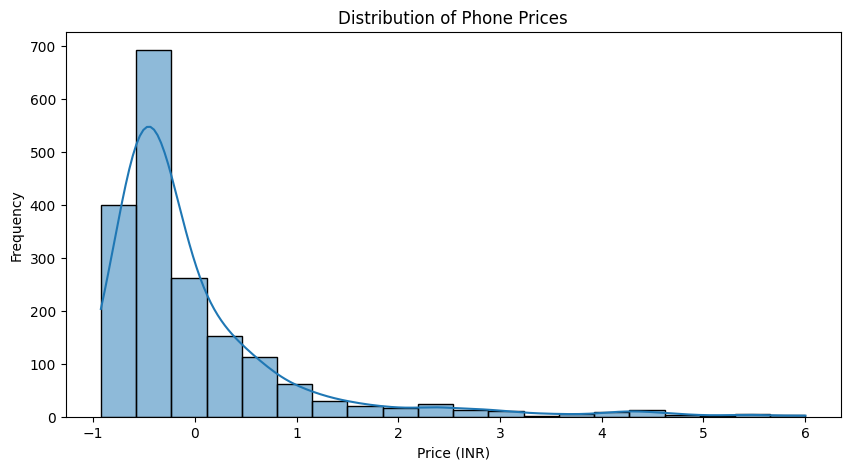

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(df_mbp['Price in INR'], bins=20, kde=True)
plt.title('Distribution of Phone Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Visualizing of FDC Data

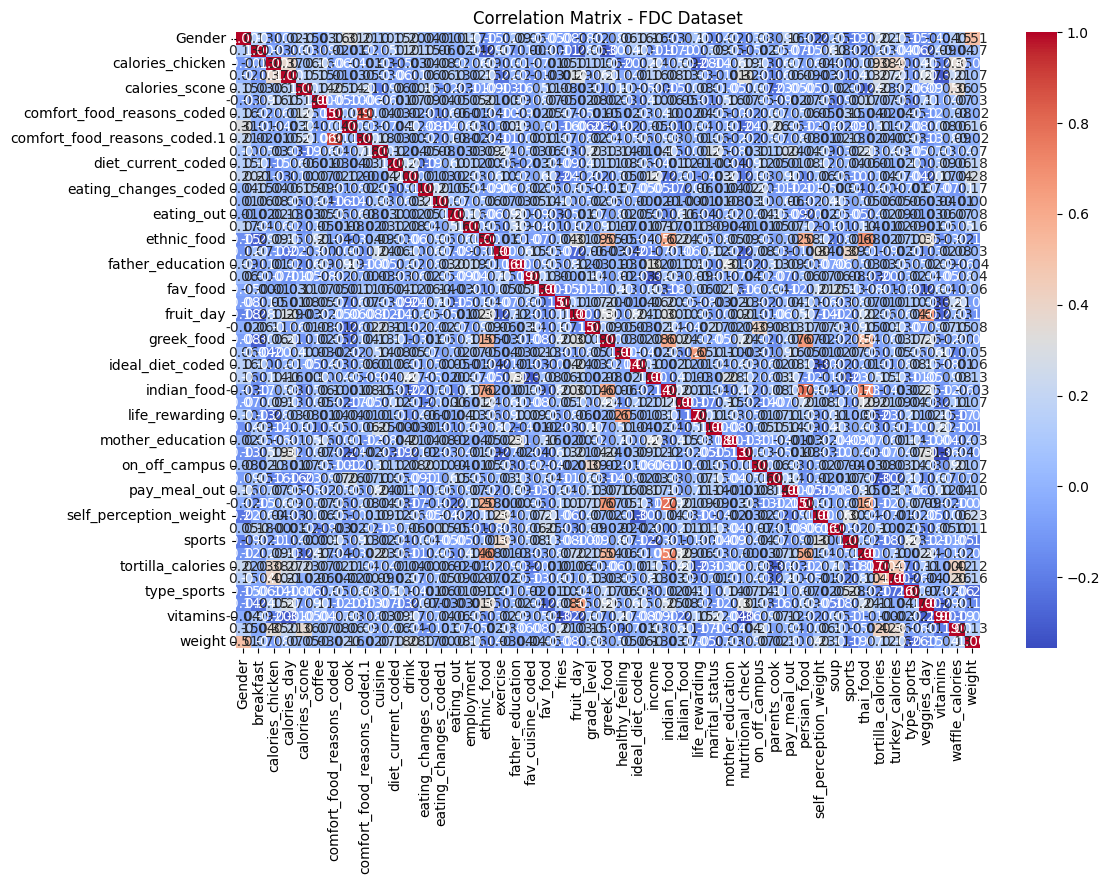

In [23]:
# Visualizing Correlation Matrix (FDC Data)
numeric_fdc = df_fdc.select_dtypes(include=['number'])
plt.figure(figsize=(12,8))
sns.heatmap(numeric_fdc.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix - FDC Dataset')
plt.show()

<Figure size 1200x800 with 0 Axes>

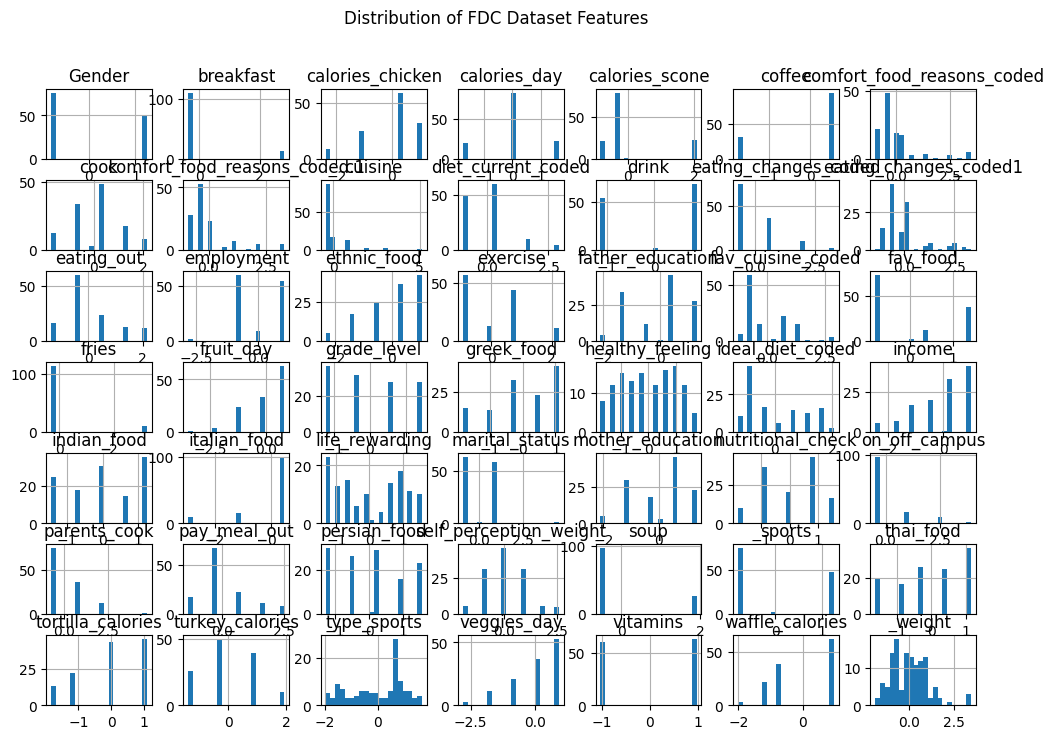

In [24]:
# Visualizing Distribution of FDC Data
plt.figure(figsize=(12, 8))
df_fdc.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of FDC Dataset Features')
plt.show()

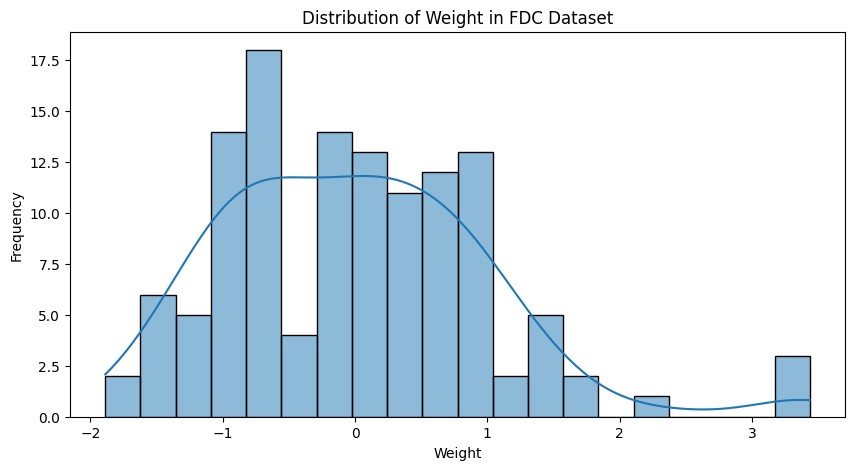

In [25]:
# Visualizing Distribution of FDC Data (Weight Only)
plt.figure(figsize=(10,5))
sns.histplot(df_fdc['weight'], bins=20, kde=True)
plt.title('Distribution of Weight in FDC Dataset')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

## Re-Check another data

<ipython-input-30-016842842821>:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_plot.hist(ax=axes[i, 0], bins=20, alpha=0.7, edgecolor='black') # Use df_plot for plotting
<ipython-input-30-016842842821>:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_plot.hist(ax=axes[i, 0], bins=20, alpha=0.7, edgecolor='black') # Use df_plot for plotting
<ipython-input-30-016842842821>:28: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_plot.hist(ax=axes[i, 0], bins=20, alpha=0.7, edgecolor='black') # Use df_plot for plotting
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.11/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)
<ipython-input-30-016842842821>:28: User

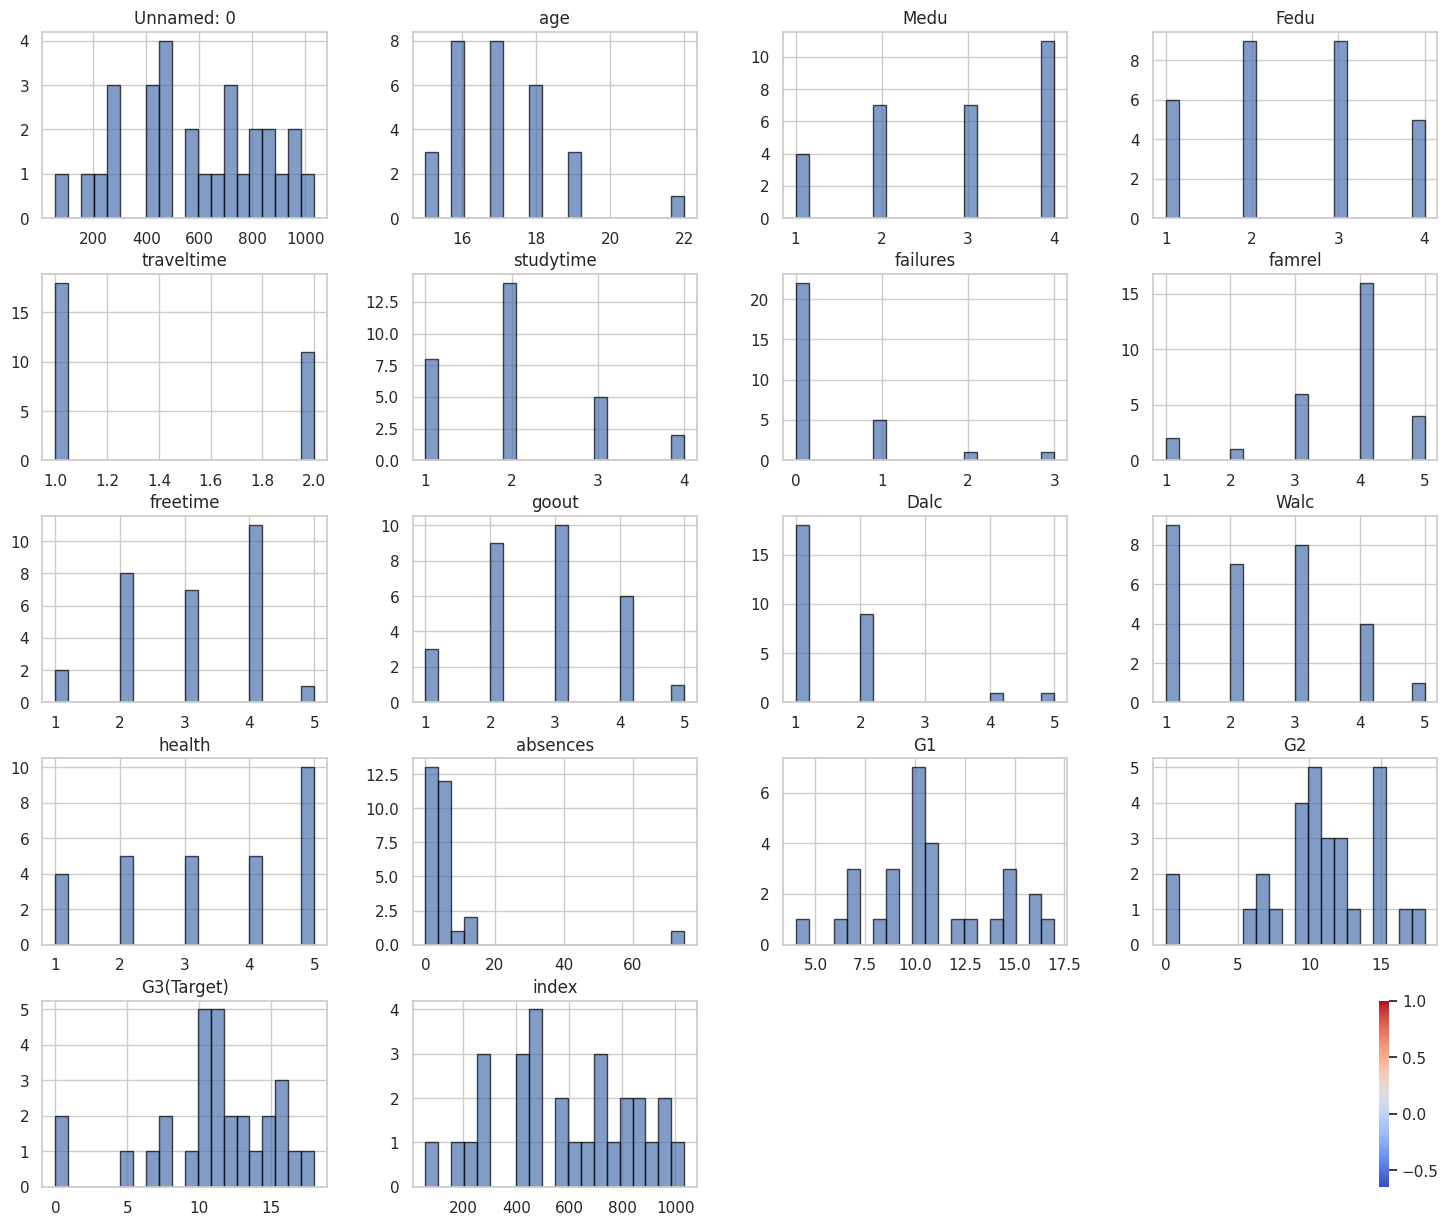

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visuals
sns.set(style="whitegrid")

# Calculate the number of rows and columns for the subplots
num_datasets = len(datasets)
num_cols = 3  # Keep 3 columns for histogram, boxplot, and heatmap
# num_rows = int(np.ceil(num_datasets / num_cols))  # Calculate rows based on datasets and columns
num_rows = num_datasets # Each dataset gets its own row

# Create subplots with the calculated dimensions
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 15))

# Flatten the axes array for easier iteration
# axes = axes.flatten() # No need to flatten with layout adjusted

for i, (name, df) in enumerate(datasets.items()):
    # Select numeric columns and replace infinite values with NaN
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan) # Replace inf and -inf with NaN

    # Drop rows with any NaN values in numeric columns for plotting
    df_plot = df[numeric_cols].dropna()

    # Histogram
    df_plot.hist(ax=axes[i, 0], bins=20, alpha=0.7, edgecolor='black') # Use df_plot for plotting
    axes[i, 0].set_title(f"{name} - Histogram")

    # Boxplot
    sns.boxplot(data=df_plot, ax=axes[i, 1]) # Use df_plot for plotting, shift index for boxplot
    axes[i, 1].set_title(f"{name} - Boxplot")
    axes[i, 1].tick_params(axis='x', rotation=90)

    # Heatmap (Correlation Matrix)
    sns.heatmap(df_plot.corr(), ax=axes[i, 2], annot=False, cmap="coolwarm", linewidths=0.5) # Use df_plot for plotting, shift index for heatmap
    axes[i, 2].set_title(f"{name} - Heatmap Korelasi")

# # Hide any unused subplots # No longer needed with new layout
# for j in range(num_datasets * 3, num_rows * num_cols):
#     fig.delaxes(axes[j])

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

## Visualization of SPY data

<ipython-input-47-a49502140b79>:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_spy[numeric_cols_spy].hist(ax=axes[0, 0], bins=20, alpha=0.7, edgecolor='black')
<ipython-input-47-a49502140b79>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, ax=axes[1, 1], palette="viridis")
<ipython-input-47-a49502140b79>:30: UserWarning: tight_layout not applied: number of rows in subplot specifications must be multiples of one another.
  plt.tight_layout()


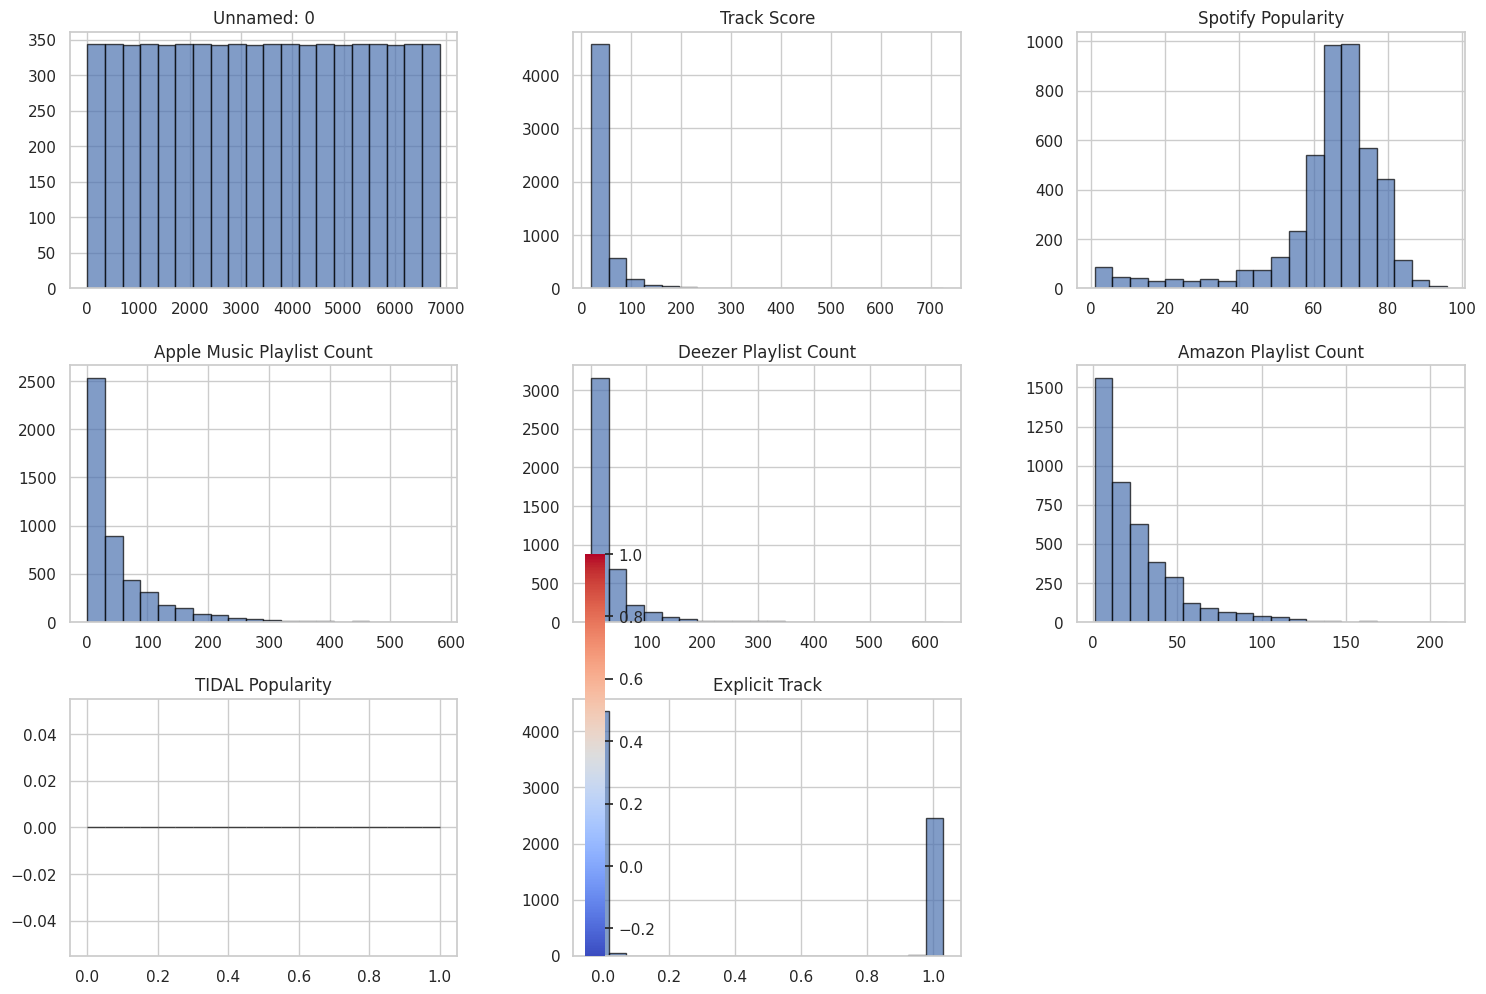

In [47]:
# Ambil dataset SPY
df_spy = datasets["SPY"]

# Pilih kolom numerik
numeric_cols_spy = df_spy.select_dtypes(include=['float64', 'int64']).columns

# Set ukuran figure
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Histogram untuk fitur numerik utama
df_spy[numeric_cols_spy].hist(ax=axes[0, 0], bins=20, alpha=0.7, edgecolor='black')
axes[0, 0].set_title("SPY - Histogram Fitur Numerik")

# Boxplot untuk mendeteksi outlier
sns.boxplot(data=df_spy[numeric_cols_spy], ax=axes[0, 1])
axes[0, 1].set_title("SPY - Boxplot Fitur Numerik")
axes[0, 1].tick_params(axis='x', rotation=90)

# Heatmap korelasi
sns.heatmap(df_spy[numeric_cols_spy].corr(), ax=axes[1, 0], annot=True, cmap="coolwarm", linewidths=0.5)
axes[1, 0].set_title("SPY - Heatmap Korelasi")

# Barplot: Jumlah track berdasarkan artis terpopuler
top_artists = df_spy['Artist'].value_counts().nlargest(10)
sns.barplot(x=top_artists.values, y=top_artists.index, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("SPY - 10 Artis dengan Jumlah Track Terbanyak")
axes[1, 1].set_xlabel("Jumlah Track")

# Tampilkan grafik
plt.tight_layout()
plt.show()


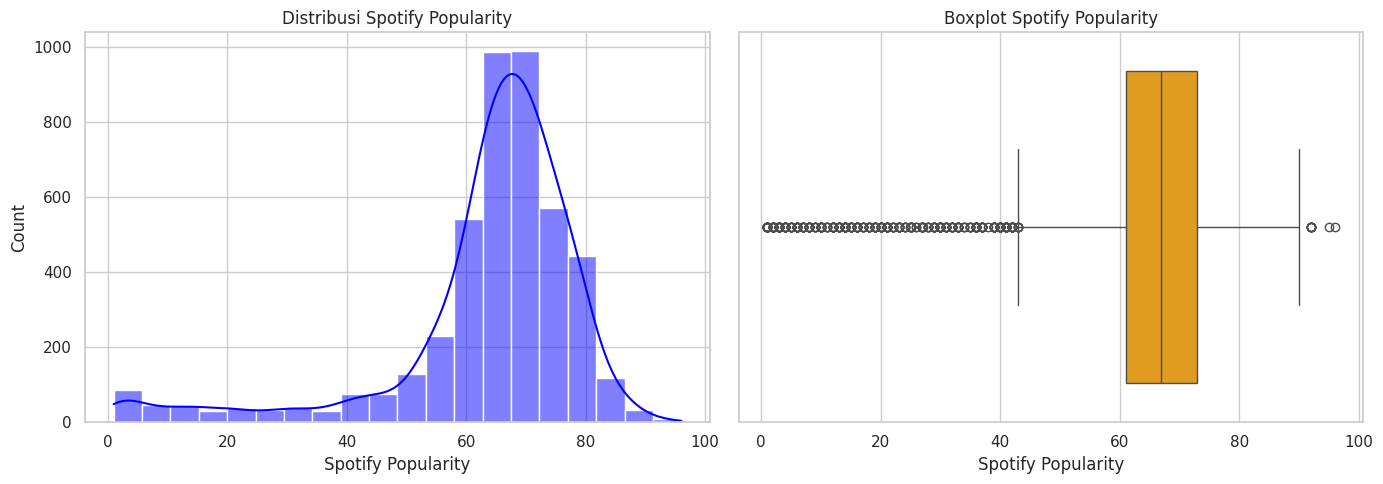

In [35]:
# Pastikan kolom "Spotify Popularity" ada dalam dataset SPY
popularity_col = "Spotify Popularity"

if popularity_col in df_spy.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df_spy[popularity_col], bins=20, kde=True, ax=axes[0], color='blue')
    axes[0].set_title("Distribusi Spotify Popularity")
    axes[0].set_xlabel("Spotify Popularity")

    # Boxplot
    sns.boxplot(x=df_spy[popularity_col], ax=axes[1], color='orange')
    axes[1].set_title("Boxplot Spotify Popularity")

    plt.tight_layout()
    plt.show()
else:
    popularity_col = df_spy.columns[df_spy.columns.str.contains("popularity", case=False, na=False)]
    popularity_col


## Visualization of STP data

<ipython-input-36-8d5ac1bfd980>:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_stp[numeric_cols_stp].hist(ax=axes[0], bins=20, alpha=0.7, edgecolor='black')
<ipython-input-36-8d5ac1bfd980>:24: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


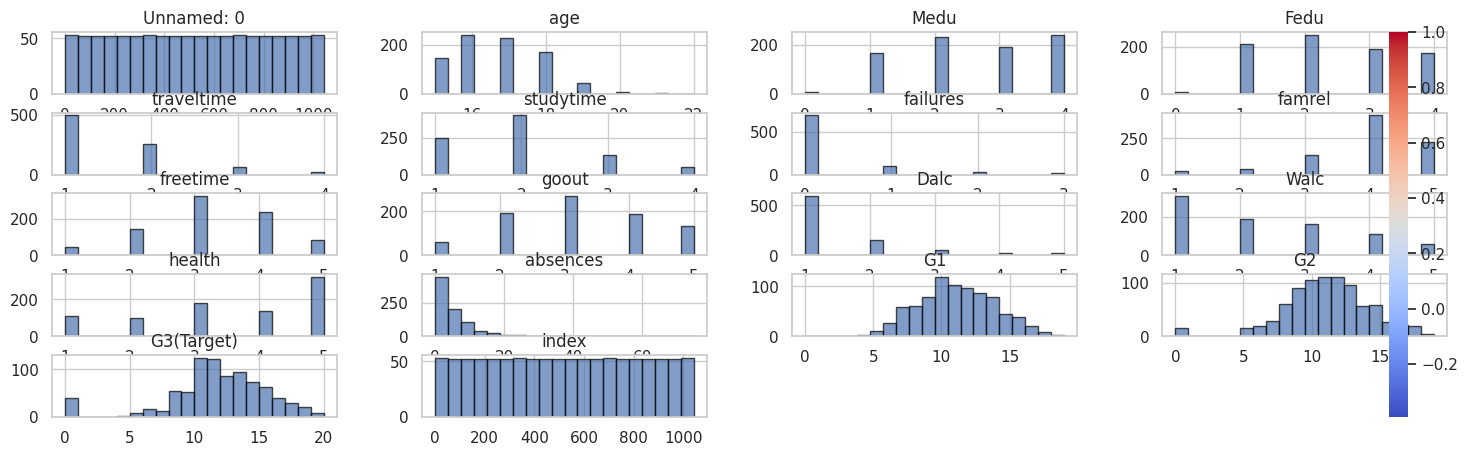

In [36]:
# Ambil dataset STP
df_stp = datasets["STP"]

# Pilih kolom numerik
numeric_cols_stp = df_stp.select_dtypes(include=['float64', 'int64']).columns

# Set ukuran figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram untuk fitur numerik utama
df_stp[numeric_cols_stp].hist(ax=axes[0], bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title("STP - Histogram Fitur Numerik")

# Boxplot untuk mendeteksi outlier
sns.boxplot(data=df_stp[numeric_cols_stp], ax=axes[1])
axes[1].set_title("STP - Boxplot Fitur Numerik")
axes[1].tick_params(axis='x', rotation=90)

# Heatmap korelasi
sns.heatmap(df_stp[numeric_cols_stp].corr(), ax=axes[2], annot=True, cmap="coolwarm", linewidths=0.5)
axes[2].set_title("STP - Heatmap Korelasi")

# Tampilkan grafik
plt.tight_layout()
plt.show()


<ipython-input-42-1f94ce8013ed>:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_stp[available_g_cols].hist(ax=axes[0], bins=20, alpha=0.7, edgecolor='black')


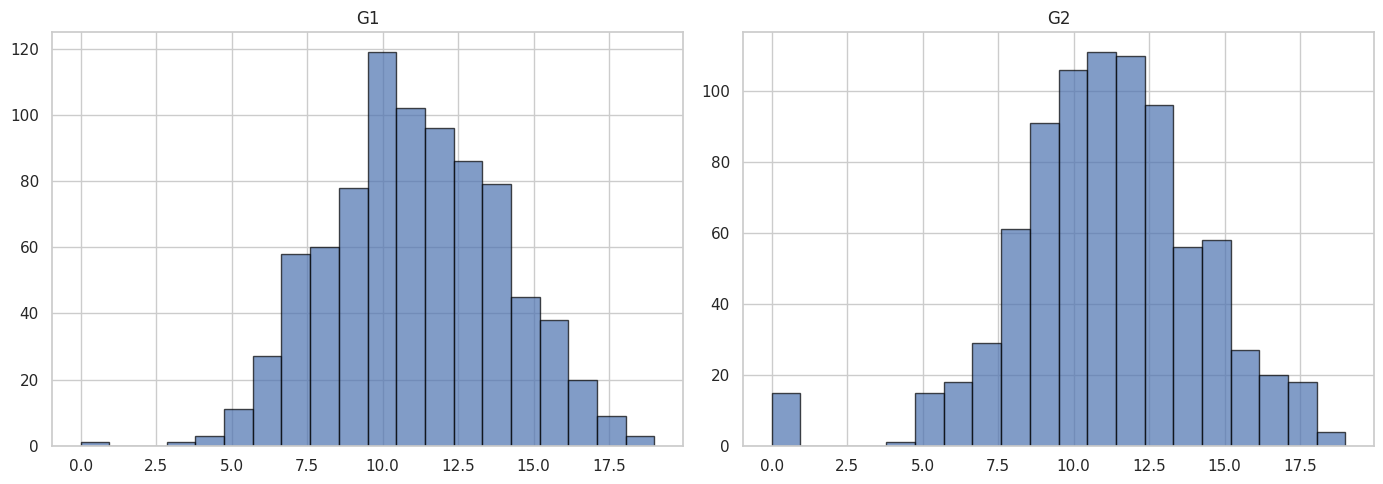

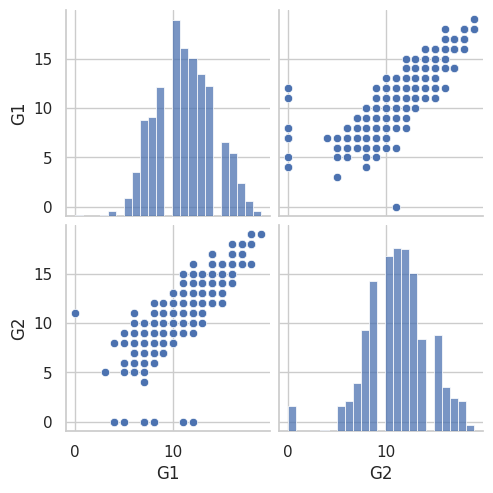

In [42]:
# Pilih kolom G1 dan G2 dari dataset STP
g_cols = ["G1", "G2", "G3"]

# Pastikan kolom tersedia dalam dataset
available_g_cols = [col for col in g_cols if col in df_stp.columns]

# Set ukuran figure
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram untuk G1, G2, dan G3
df_stp[available_g_cols].hist(ax=axes[0], bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title("Distribusi G1, G2, dan G3")

# Boxplot untuk G1, G2, dan G3
sns.boxplot(data=df_stp[available_g_cols], ax=axes[1])
axes[1].set_title("Boxplot G1, G2, dan G3")
axes[1].tick_params(axis='x', rotation=90)

# Tampilkan grafik
plt.tight_layout()
plt.show()

# Scatterplot matrix (Pairplot) untuk melihat hubungan antar G1, G2, dan G3
sns.pairplot(df_stp[available_g_cols])
plt.show()


## Visualization of SHP data

<ipython-input-44-cab2af700747>:11: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_shp[numeric_cols_shp].hist(ax=axes[0], bins=20, alpha=0.7, edgecolor='black')


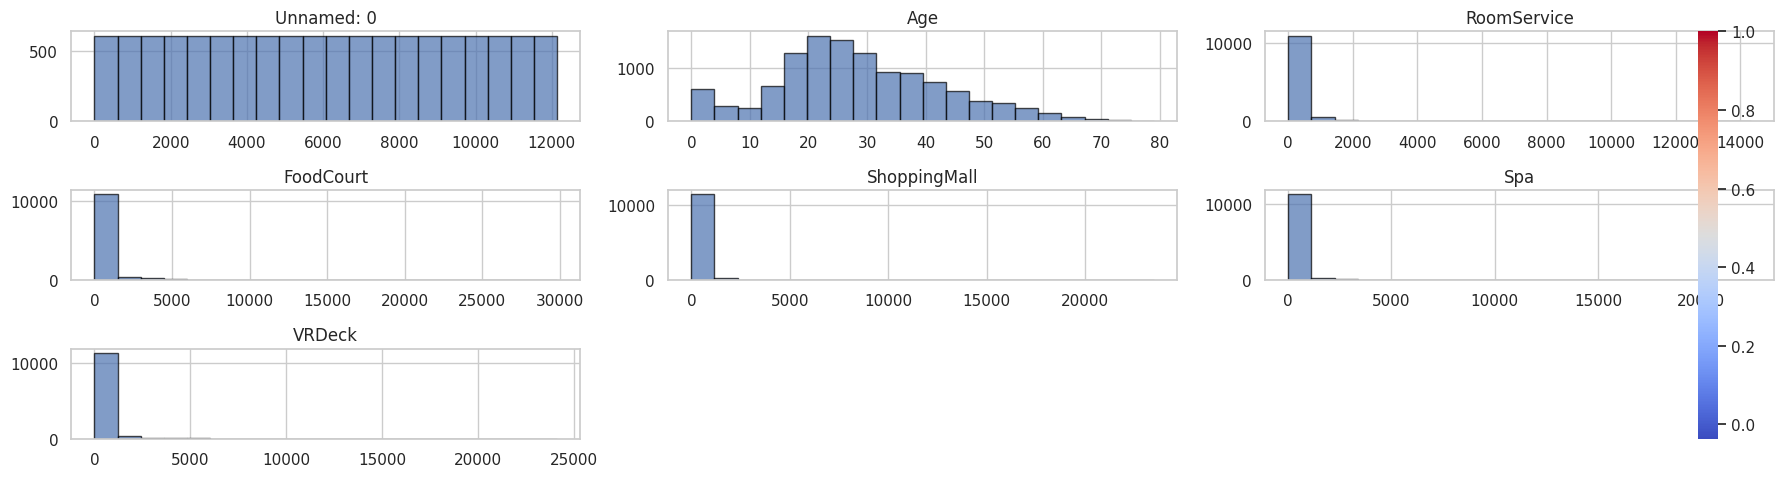

In [44]:
# Ambil dataset SHP
df_shp = datasets["SHP"]

# Pilih kolom numerik
numeric_cols_shp = df_shp.select_dtypes(include=['float64', 'int64']).columns

# Set ukuran figure
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histogram untuk fitur numerik utama
df_shp[numeric_cols_shp].hist(ax=axes[0], bins=20, alpha=0.7, edgecolor='black')
axes[0].set_title("SHP - Histogram Fitur Numerik")

# Boxplot untuk mendeteksi outlier
sns.boxplot(data=df_shp[numeric_cols_shp], ax=axes[1])
axes[1].set_title("SHP - Boxplot Fitur Numerik")
axes[1].tick_params(axis='x', rotation=90)

# Heatmap korelasi
sns.heatmap(df_shp[numeric_cols_shp].corr(), ax=axes[2], annot=True, cmap="coolwarm", linewidths=0.5)
axes[2].set_title("SHP - Heatmap Korelasi")

# Tampilkan grafik
plt.tight_layout()
plt.show()


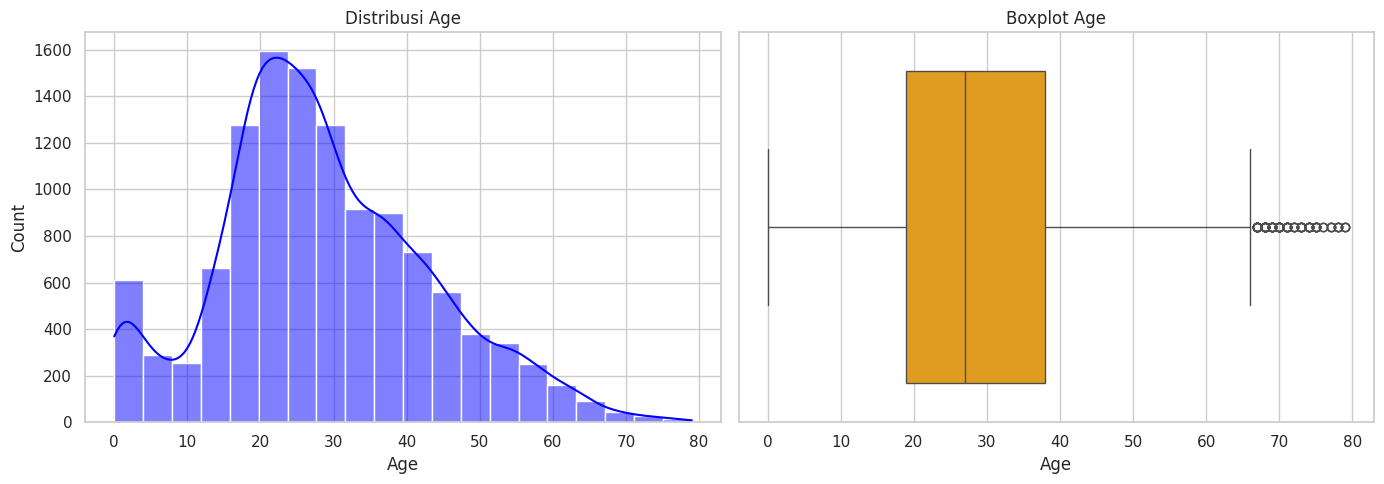

In [45]:
# Pastikan kolom "Age" ada dalam dataset SHP
age_col = "Age"

if age_col in df_shp.columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram Age
    sns.histplot(df_shp[age_col], bins=20, kde=True, ax=axes[0], color='blue')
    axes[0].set_title("Distribusi Age")
    axes[0].set_xlabel("Age")

    # Boxplot Age
    sns.boxplot(x=df_shp[age_col], ax=axes[1], color='orange')
    axes[1].set_title("Boxplot Age")

    plt.tight_layout()
    plt.show()
else:
    age_col = df_shp.columns[df_shp.columns.str.contains("age", case=False, na=False)]
    age_col
